이미지 다운로드 및 경로 출력

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("larserikrisholm/dinosaur-image-dataset-15-species")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dinosaur-image-dataset-15-species


이미지 정규화 및 데이터셋 분리

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/kaggle/input/dinosaur-image-dataset-15-species/dinosaur_dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1964 images belonging to 15 classes.
Found 484 images belonging to 15 classes.


훈련 데이터셋 50개 출력

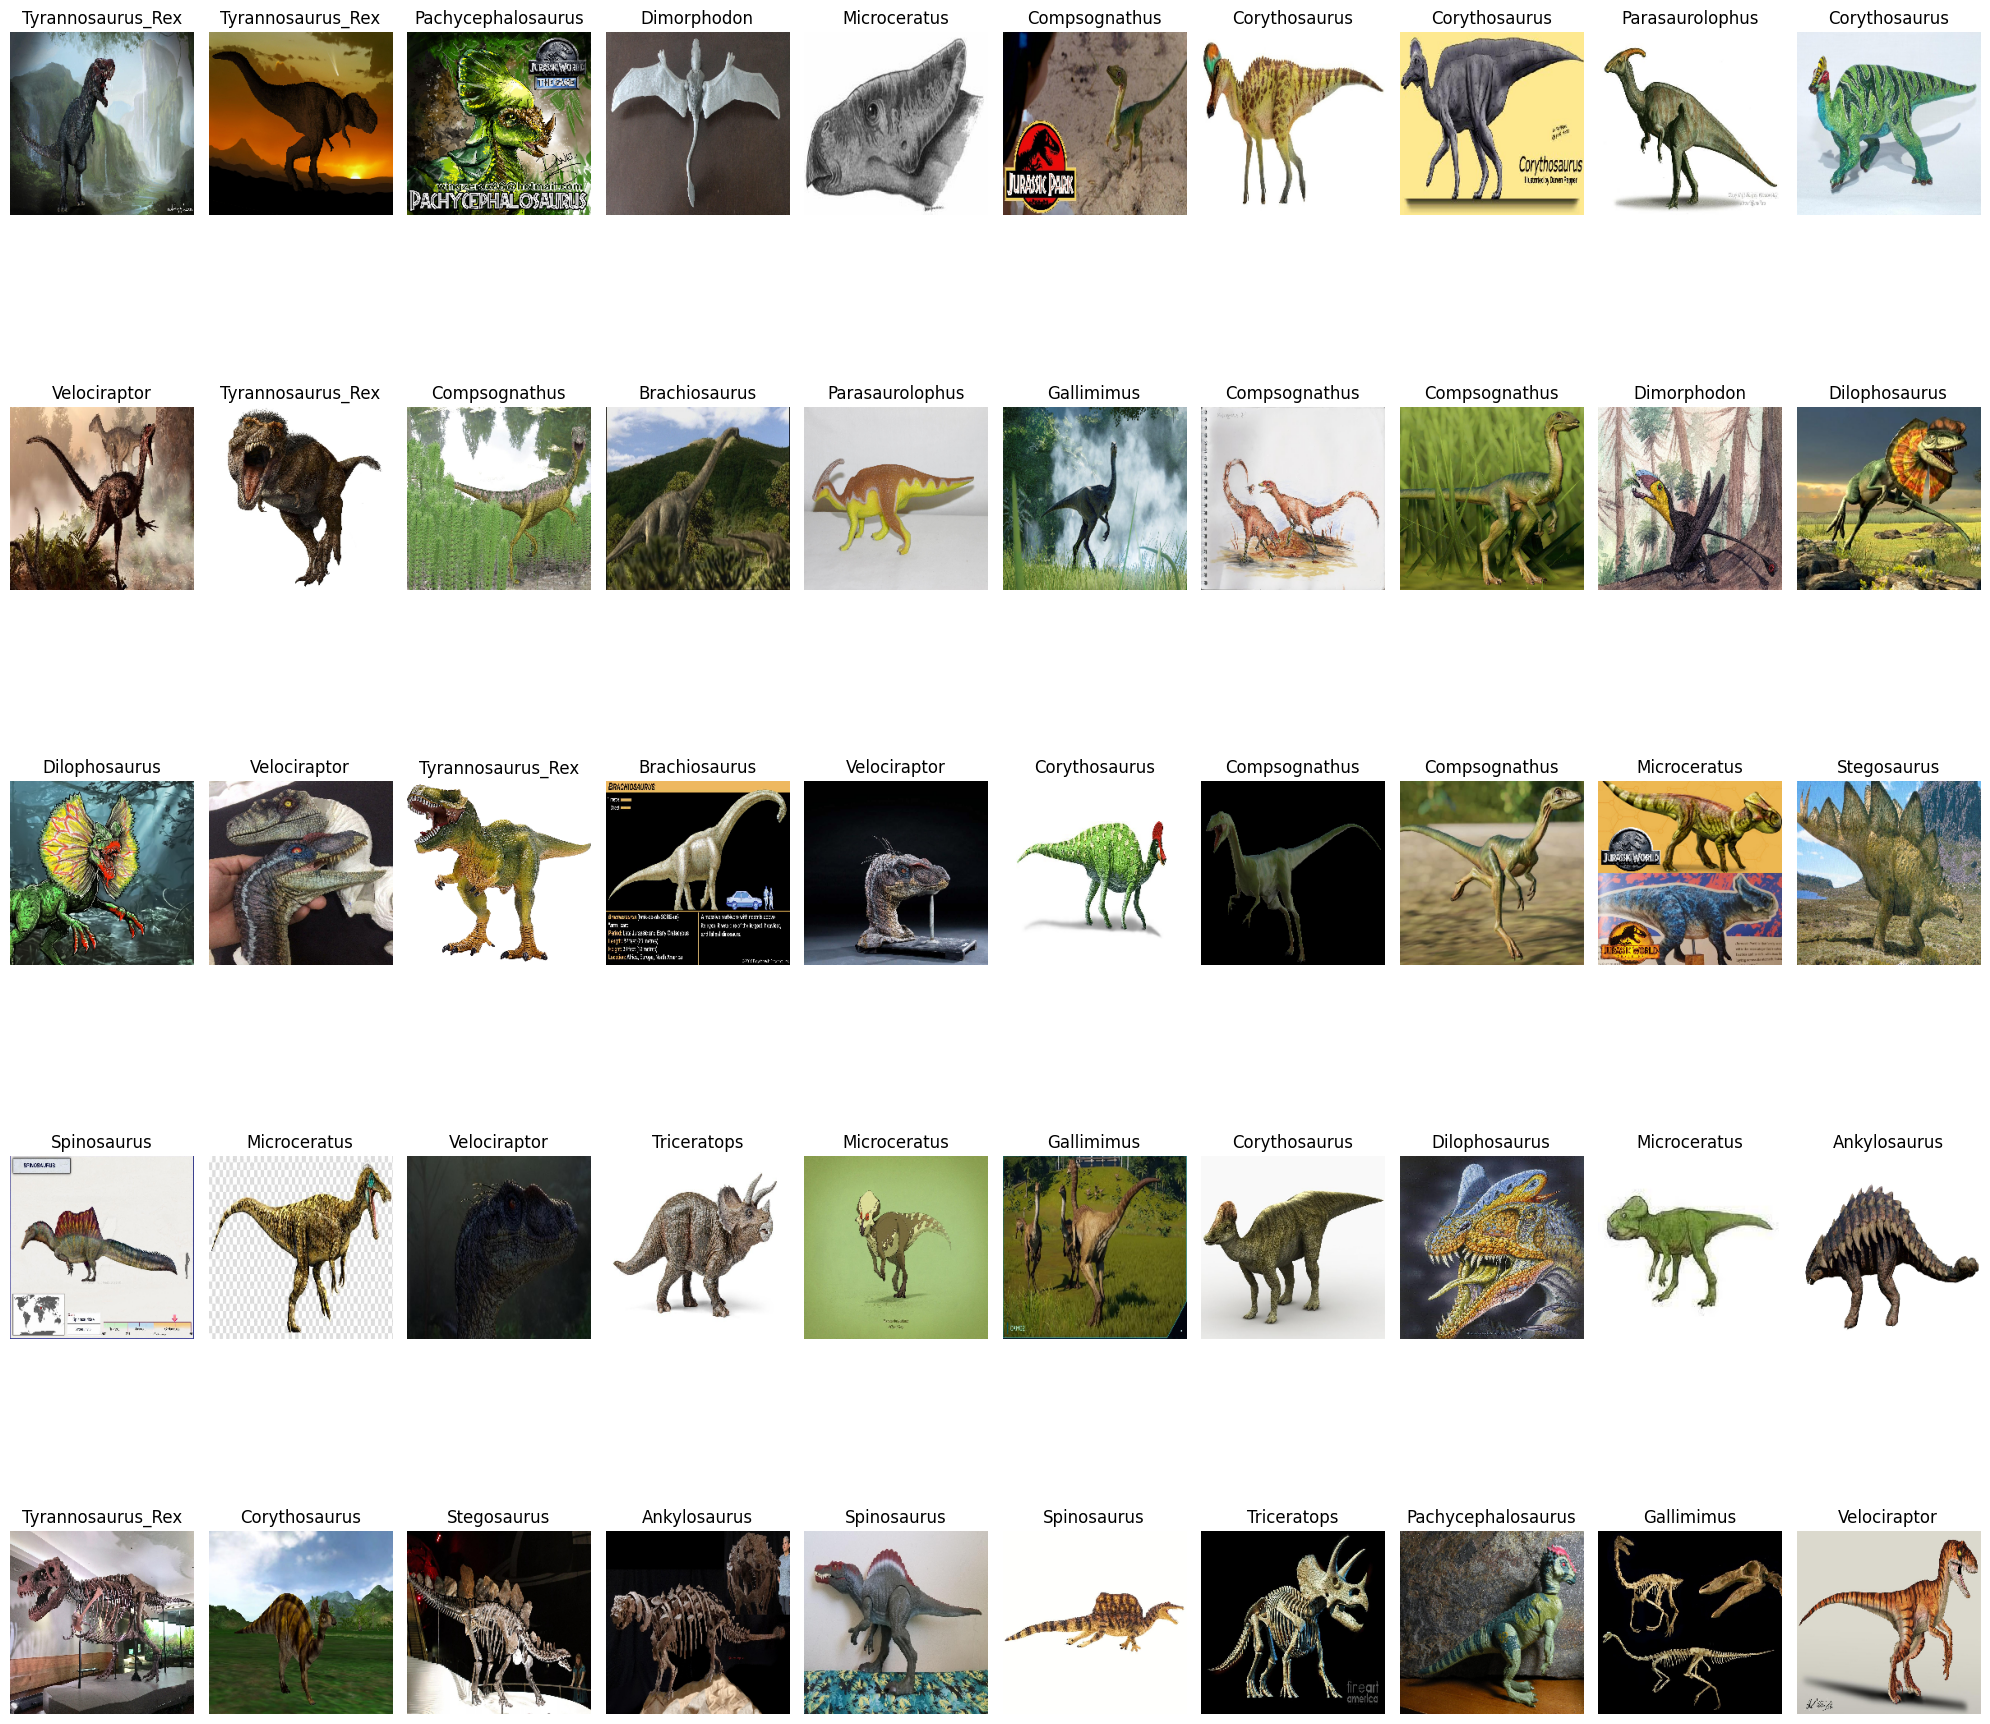

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 이름 가져오기
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# 이미지를 저장할 리스트 초기화
all_images = []
all_labels = []

# 50개의 이미지를 모을 때까지 배치 가져오기
while len(all_images) < 50:
    images, labels = next(train_generator)
    all_images.extend(images)
    all_labels.extend(labels)

# 처음 50개의 이미지와 레이블 선택
images_to_display = all_images[:50]
labels_to_display = all_labels[:50]


# 이미지 50개 출력
plt.figure(figsize=(20, 20)) # Adjusted figure size for more images
for i in range(50): # Loop for 50 images
    plt.subplot(5, 10, i+1) # Changed grid to 5 rows and 10 columns
    plt.imshow(images_to_display[i])
    plt.title(class_names[np.argmax(labels_to_display[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()